# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [ ]:
# Import warnings

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Import the libraries you will be using for analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
!pip uninstall -y numpy
!pip install numpy==1.26.4
!pip uninstall -y pandas
!pip install pandas==2.2.2
!pip install matplotlib==3.9.4
!pip install seaborn==0.13.2


Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
  Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.0 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask-cudf-cu12 25.10.0 requires pandas<2.4.0dev0,>=2.0, which is not installed.
dopamine-rl 4.1.2 requires pandas>=0.24.2, which is not installed.
yfinance 0.2.66 requires pandas>=1.3.0, which is not installed.
bokeh 3.7.3 requires pandas>=1.2, which is not installed.
prophet 1.1.7 requires pandas>=1.0.4, which is not installed.
dask-cuda 25.10.0 requires pandas>=1.3, which is not installed.
gradio 5.49.1 requires pandas<3.0,>=1.0, which is not installed.
cufflinks 0.17.3 requires pandas>=0.19.2, which is not in

  Using cached pandas-2.2.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (19 kB)
Using cached pandas-2.2.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.7 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
shap 0.50.0 requires numpy>=2, but you have numpy 1.26.4 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 83.7 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0


In [ ]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.0.2
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [ ]:
# Try loading one file
import pandas as pd
df = pd.read_parquet("/content/drive/MyDrive/yellow_tripdata_2023-01.parquet")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd

os.chdir('/content/drive/MyDrive/Assignments/EDA/data_NYC_Taxi/trip_records')

file_list = [f for f in os.listdir() if f.endswith('.parquet')]

final_df = []

for file_name in file_list:
    print("Processing:", file_name)

    file_path = os.path.join(os.getcwd(), file_name)
    monthly_data = pd.read_parquet(file_path)

    # Convert to datetime + extract date & hour
    monthly_data['tpep_pickup_datetime'] = pd.to_datetime(monthly_data['tpep_pickup_datetime'])
    monthly_data['pickup_date'] = monthly_data['tpep_pickup_datetime'].dt.date
    monthly_data['pickup_hour'] = monthly_data['tpep_pickup_datetime'].dt.hour

    # Group by date and hour, sample 5% from each group
    sampled = (
        monthly_data
        .groupby(['pickup_date', 'pickup_hour'], group_keys=False)
        .apply(lambda x: x.sample(frac=0.05, random_state=42))
    )

    final_df.append(sampled)

# Combine all months
df = pd.concat(final_df, ignore_index=True)

print("Final sample size:", df.shape)


Processing: yellow_tripdata_2023-09.parquet


/tmp/ipython-input-1345917628.py:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(frac=0.05, random_state=42))


Processing: yellow_tripdata_2023-08.parquet


/tmp/ipython-input-1345917628.py:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(frac=0.05, random_state=42))


Processing: yellow_tripdata_2023-12.parquet


/tmp/ipython-input-1345917628.py:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(frac=0.05, random_state=42))


Processing: yellow_tripdata_2023-11.parquet


/tmp/ipython-input-1345917628.py:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(frac=0.05, random_state=42))


Processing: yellow_tripdata_2023-10.parquet


/tmp/ipython-input-1345917628.py:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(frac=0.05, random_state=42))


Processing: yellow_tripdata_2023-03.parquet


/tmp/ipython-input-1345917628.py:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(frac=0.05, random_state=42))


Processing: yellow_tripdata_2023-07.parquet


/tmp/ipython-input-1345917628.py:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(frac=0.05, random_state=42))


Processing: yellow_tripdata_2023-06.parquet


/tmp/ipython-input-1345917628.py:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(frac=0.05, random_state=42))


Processing: yellow_tripdata_2023-04.parquet


/tmp/ipython-input-1345917628.py:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(frac=0.05, random_state=42))


Processing: yellow_tripdata_2023-05.parquet


/tmp/ipython-input-1345917628.py:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(frac=0.05, random_state=42))


Processing: 2023-01.parquet


/tmp/ipython-input-1345917628.py:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(frac=0.05, random_state=42))


Processing: yellow_tripdata_2023-02.parquet
Final sample size: (1915511, 22)


/tmp/ipython-input-1345917628.py:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(frac=0.05, random_state=42))


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [ ]:
# Store the df in csv/parquet
df.to_parquet('/content/drive/MyDrive/Assignments/EDA/data_NYC_Taxi/sampled_2023.parquet', index=False)


## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [ ]:
# Load the new data file
import pandas as pd

df_new = pd.read_parquet('/content/drive/MyDrive/Assignments/EDA/data_NYC_Taxi/sampled_2023.parquet')
df_new.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1915511 entries, 0 to 1915510
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

In [ ]:
df_new.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,pickup_date,pickup_hour,airport_fee
0,2,2023-08-31 23:56:01,2023-09-01 00:18:41,1.0,3.11,1.0,N,114,246,1,...,0.5,0.0,0.0,1.0,26.20,2.5,0.00,2023-08-31,23,NaN
1,2,2023-09-01 00:30:27,2023-09-01 00:48:16,1.0,3.53,1.0,N,230,232,1,...,0.5,6.2,0.0,1.0,31.00,2.5,0.00,2023-09-01,0,NaN
2,2,2023-09-01 00:30:37,2023-09-01 01:09:47,1.0,17.23,1.0,N,132,188,1,...,0.5,8.0,0.0,1.0,81.05,0.0,1.75,2023-09-01,0,NaN
3,2,2023-09-01 00:19:39,2023-09-01 00:24:08,6.0,0.49,1.0,N,48,230,2,...,0.5,0.0,0.0,1.0,10.80,2.5,0.00,2023-09-01,0,NaN
4,1,2023-09-01 00:17:14,2023-09-01 00:29:06,1.0,2.00,1.0,N,144,68,1,...,0.5,3.4,0.0,1.0,20.50,2.5,0.00,2023-09-01,0,NaN


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1915511 entries, 0 to 1915510
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [ ]:
# Fix the index and drop any columns that are not needed

df_new.reset_index(drop=True, inplace=True)
df_new = df_new.drop(['pickup_date', 'pickup_hour'], axis=1)


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [ ]:
# Combine the two airport fee columns

df_new['airport_fee_combined'] = df_new[['airport_fee', 'Airport_fee']].max(axis=1)
df_new = df_new.drop(['airport_fee', 'Airport_fee'], axis=1)


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [ ]:
# check where values of fare amount are negative

df_new[df_new['fare_amount'] < 0]


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee_combined
103,2,2023-09-01 00:30:36,2023-09-01 00:37:10,1.0,2.37,1.0,N,211,186,3,-11.4,-1.0,-0.5,0.0,0.0,-1.0,-16.40,-2.5,0.00
187,2,2023-09-01 01:08:30,2023-09-01 01:13:20,1.0,0.02,1.0,N,132,132,4,-5.8,-1.0,-0.5,0.0,0.0,-1.0,-10.05,0.0,-1.75
198,2,2023-09-01 01:07:57,2023-09-01 01:15:55,1.0,1.54,1.0,N,125,158,4,-10.0,-1.0,-0.5,0.0,0.0,-1.0,-15.00,-2.5,0.00
255,2,2023-09-01 02:05:34,2023-09-01 02:13:20,1.0,1.72,1.0,N,234,144,2,-10.7,-1.0,-0.5,0.0,0.0,-1.0,-15.70,-2.5,0.00
407,2,2023-09-01 06:14:47,2023-09-01 06:22:09,1.0,1.04,1.0,N,74,166,4,-8.6,0.0,-0.5,0.0,0.0,-1.0,-10.10,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915231,2,2023-02-28 22:54:48,2023-02-28 23:02:40,1.0,1.28,1.0,N,142,237,4,-10.0,-1.0,-0.5,0.0,0.0,-1.0,-15.00,-2.5,0.00
1915340,2,2023-02-28 22:03:58,2023-02-28 22:06:34,1.0,0.60,1.0,N,262,140,2,-5.1,-1.0,-0.5,0.0,0.0,-1.0,-10.10,-2.5,0.00
1915419,2,2023-02-28 23:39:42,2023-02-28 23:49:35,1.0,8.65,1.0,N,132,93,4,-33.1,-1.0,-0.5,0.0,0.0,-1.0,-36.85,0.0,-1.25
1915453,2,2023-02-28 23:44:22,2023-02-28 23:44:30,1.0,0.00,5.0,N,68,68,4,-10.0,0.0,-0.5,0.0,0.0,-1.0,-14.00,-2.5,0.00


Did you notice something different in the `RatecodeID` column for above records?

In [ ]:
# Analyse RatecodeID for the negative fare amounts

df_new[df_new['fare_amount'] < 0]['RatecodeID'].value_counts()


,count
RatecodeID,
1.0,16721
2.0,1324
5.0,369
3.0,223
4.0,88


In [ ]:
# Find which columns have negative values

numeric_cols_new = df_new.select_dtypes(include=['number'])  # only numeric columns
negative_columns_new = numeric_cols_new.loc[:, (numeric_cols_new < 0).any()].columns
negative_columns_new


Index(['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'congestion_surcharge',
       'airport_fee_combined'],
      dtype='object')

In [ ]:
# fix these negative values

for col in negative_columns_new:   # Replace negative values with 0
    df_new.loc[df_new[col] < 0, col] = 0


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [ ]:
# Find the proportion of missing values in each column

df_new.isnull().mean() * 100



,0
VendorID,0.000000
tpep_pickup_datetime,0.000000
tpep_dropoff_datetime,0.000000
passenger_count,3.400659
trip_distance,0.000000
RatecodeID,3.400659
store_and_fwd_flag,3.400659
PULocationID,0.000000
DOLocationID,0.000000
payment_type,0.000000


In [ ]:
# Display the rows with null values
df_new[df_new.isnull().any(axis=1)]


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee_combined
52,1,2023-09-01 00:26:02,2023-09-01 00:31:25,NaN,1.00,NaN,None,48,68,0,7.20,1.0,0.5,2.44,0.00,1.0,14.64,NaN,NaN
60,2,2023-09-01 00:37:35,2023-09-01 00:48:27,NaN,3.47,NaN,None,7,70,0,18.83,0.0,0.5,3.05,0.00,1.0,23.38,NaN,NaN
232,1,2023-09-01 02:29:04,2023-09-01 02:45:34,NaN,0.00,NaN,None,79,48,0,19.85,0.0,0.5,0.00,0.00,1.0,23.85,NaN,NaN
283,1,2023-09-01 03:09:09,2023-09-01 03:28:21,NaN,0.00,NaN,None,79,74,0,24.87,0.0,0.5,0.00,0.00,1.0,28.87,NaN,NaN
292,2,2023-09-01 03:13:27,2023-09-01 03:29:17,NaN,9.06,NaN,None,140,138,0,26.50,0.0,0.5,7.49,6.94,1.0,44.93,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915224,2,2023-02-28 22:10:00,2023-02-28 22:24:00,NaN,3.17,NaN,None,161,79,0,16.34,0.0,0.5,2.03,0.00,1.0,22.37,NaN,NaN
1915271,2,2023-02-28 22:07:42,2023-02-28 22:13:06,NaN,1.21,NaN,None,113,90,0,14.29,0.0,0.5,1.83,0.00,1.0,20.12,NaN,NaN
1915278,2,2023-02-28 22:13:48,2023-02-28 22:36:49,NaN,6.83,NaN,None,144,238,0,29.89,0.0,0.5,4.07,0.00,1.0,37.96,NaN,NaN
1915348,2,2023-02-28 23:21:55,2023-02-28 23:36:12,NaN,3.17,NaN,None,87,234,0,18.46,0.0,0.5,2.25,0.00,1.0,24.71,NaN,NaN


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [ ]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
df_new.fillna({'passenger_count': df_new['passenger_count'].mode()[0]}, inplace=True)


Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [ ]:
# Fix missing values in 'RatecodeID'
df_new['RatecodeID'] = df_new['RatecodeID'].fillna(df_new['RatecodeID'].mode()[0])


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [ ]:
# handle null values in congestion_surcharge

df_new['congestion_surcharge'] = df_new['congestion_surcharge'].fillna(df_new['congestion_surcharge'].median())


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [ ]:
# Handle any remaining missing values
df_new['store_and_fwd_flag'] = df_new['store_and_fwd_flag'].fillna(
    df_new['store_and_fwd_flag'].mode()[0]
)
df_new['airport_fee_combined'] = df_new['airport_fee_combined'].fillna(0)


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [ ]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

df_new.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee_combined
count,1.915511e+06,1915511,1915511,1.915511e+06,1.915511e+06,1.915511e+06,1.915511e+06,1.915511e+06,1.915511e+06,1.915511e+06,1.915511e+06,1.915511e+06,1.915511e+06,1.915511e+06,1.915511e+06,1.915511e+06,1.915511e+06,1.915511e+06
mean,1.735655e+00,2023-07-02 23:05:36.265227,2023-07-02 23:22:58.586356,1.356417e+00,4.218820e+00,1.604843e+00,1.652210e+02,1.639272e+02,1.185405e+00,1.965519e+01,1.572001e+00,4.903817e-01,3.514145e+00,5.894853e-01,9.892541e-01,2.862746e+01,2.290471e+00,1.366746e-01
min,1.000000e+00,2022-12-31 23:51:30,2022-12-31 23:56:06,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,2023-04-02 18:29:36,2023-04-02 18:46:38,1.000000e+00,1.040000e+00,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,9.300000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.595000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,2023-06-27 18:46:52,2023-06-27 19:01:35,1.000000e+00,1.780000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.350000e+01,1.000000e+00,5.000000e-01,2.800000e+00,0.000000e+00,1.000000e+00,2.100000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,2023-10-06 21:58:00,2023-10-06 22:14:06.500000,1.000000e+00,3.400000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.190000e+01,2.500000e+00,5.000000e-01,4.400000e+00,0.000000e+00,1.000000e+00,3.072000e+01,2.500000e+00,0.000000e+00
max,6.000000e+00,2023-12-31 23:58:50,2024-01-01 00:29:11,9.000000e+00,1.590176e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,9.046000e+02,2.080000e+01,5.750000e+00,4.111000e+02,1.047500e+02,1.000000e+00,9.061000e+02,2.500000e+00,1.750000e+00
std,4.459047e-01,NaN,NaN,8.780806e-01,2.643076e+02,7.200929e+00,6.401518e+01,6.986284e+01,5.569648e-01,1.833623e+01,1.825983e+00,6.905824e-02,4.048837e+00,2.175026e+00,1.024442e-01,2.293852e+01,6.927620e-01,4.554669e-01


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [ ]:
# remove passenger_count > 6
df_new = df_new[df_new['passenger_count'] <= 6]


In [ ]:
# Continue with outlier handling
df_new = df_new[~((df_new['trip_distance'] < 0.1) & (df_new['fare_amount'] > 300))]

df_new = df_new[~((df_new['trip_distance'] == 0) &
                  (df_new['fare_amount'] == 0) &
                  (df_new['PULocationID'] != df_new['DOLocationID']))]

df_new = df_new[df_new['trip_distance'] <= 250]

df_new = df_new[df_new['payment_type'] != 0]



In [ ]:
# Do any columns need standardising?
cols_to_scale = ['trip_distance', 'fare_amount', 'total_amount', 'tip_amount', 'tolls_amount']
for col in cols_to_scale: df_new[col] = (df_new[col] - df_new[col].min()) / (df_new[col].max() - df_new[col].min())



## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [ ]:
df_new.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee_combined']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

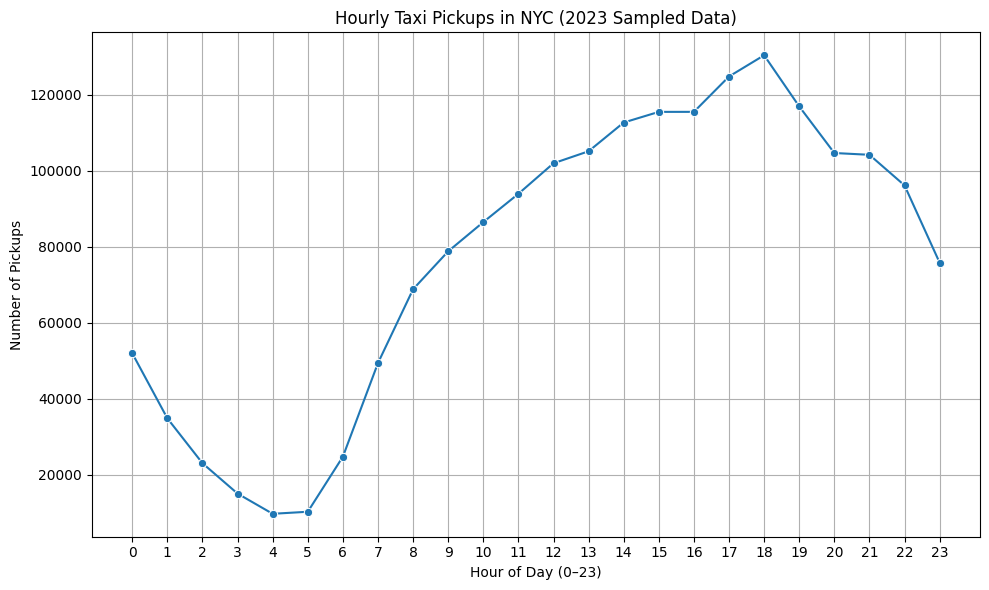

In [ ]:
# Find and show the hourly trends in taxi pickups

df_new['pickup_hour'] = df_new['tpep_pickup_datetime'].dt.hour
hourly_trend = df_new.groupby('pickup_hour').size().reset_index(name='pickup_count')

plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_trend, x='pickup_hour', y='pickup_count', marker='o')
plt.title('Hourly Taxi Pickups in NYC (2023 Sampled Data)')
plt.xlabel('Hour of Day (0–23)')
plt.ylabel('Number of Pickups')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

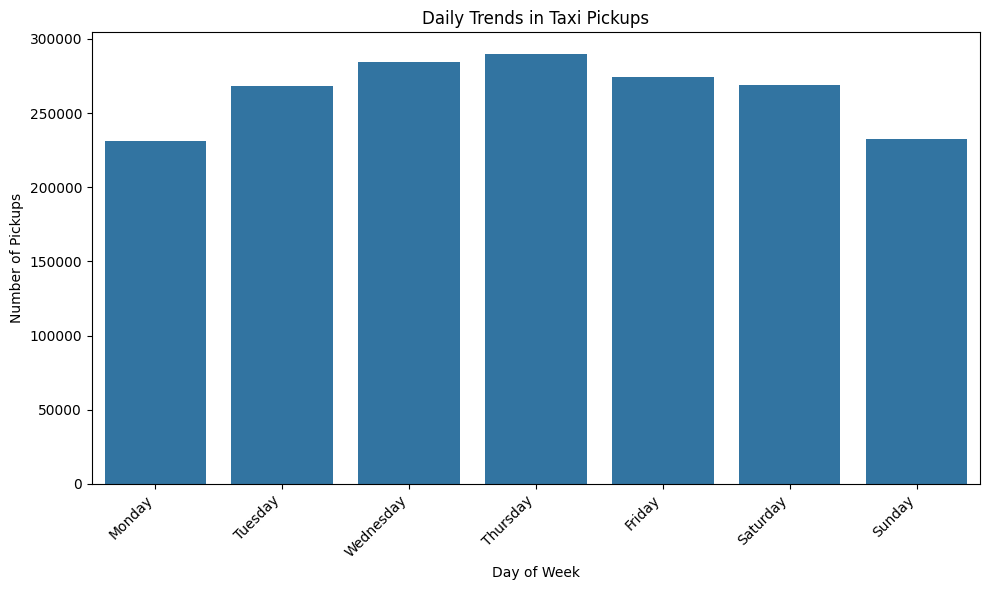

In [ ]:
# Find and show the daily trends in taxi pickups (days of the week)
df_new['pickup_day'] = df_new['tpep_pickup_datetime'].dt.day_name()

daily_pickups = df_new.groupby('pickup_day')['tpep_pickup_datetime'].count()

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_pickups = daily_pickups.reindex(days_order)

plt.figure(figsize=(10, 6))
sns.barplot(x=daily_pickups.index, y=daily_pickups.values)  # Using Seaborn for better aesthetics
plt.xlabel('Day of Week')
plt.ylabel('Number of Pickups')
plt.title('Daily Trends in Taxi Pickups')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

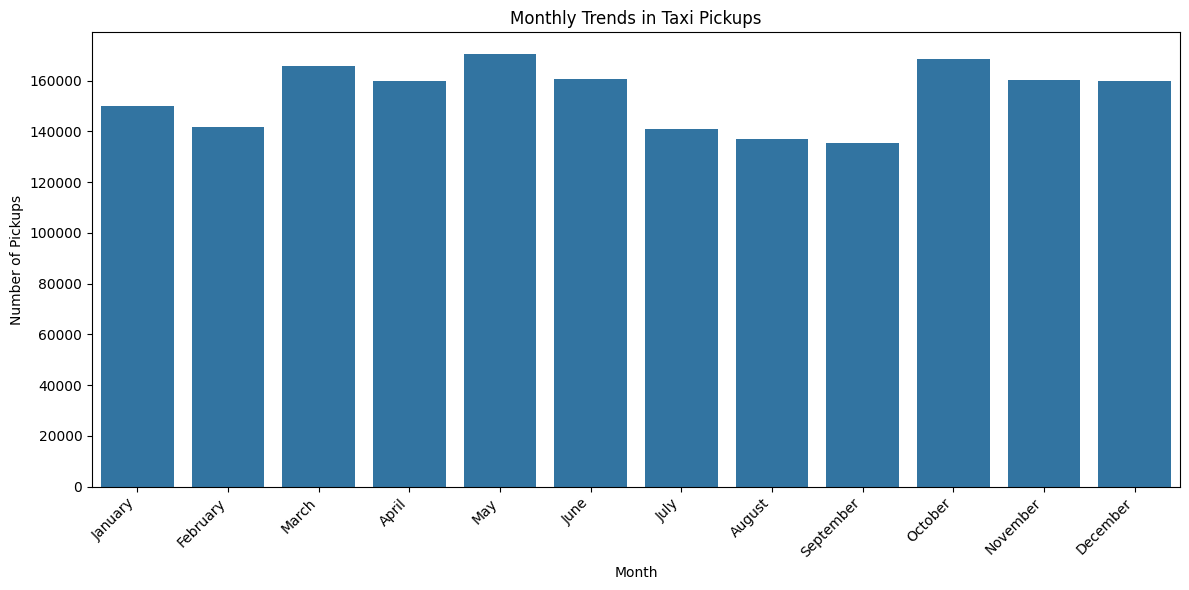

In [ ]:
# Show the monthly trends in pickups
df_new['pickup_month'] = df_new['tpep_pickup_datetime'].dt.month_name()
monthly_pickups = df_new.groupby('pickup_month')['tpep_pickup_datetime'].count()
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_pickups = monthly_pickups.reindex(months_order)

plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_pickups.index, y=monthly_pickups.values)
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.title('Monthly Trends in Taxi Pickups')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [ ]:
# Analyse the above parameters
columns_to_check = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']
analysis = pd.DataFrame(columns=columns_to_check)
analysis.loc['Zero Count'] = [ (df_new[col] == 0).sum() for col in columns_to_check ]
analysis.loc['Negative Count'] = [ (df_new[col] < 0).sum() for col in columns_to_check ]
analysis.round(2)


,fare_amount,tip_amount,total_amount,trip_distance
Zero Count,19219,428205,18999,25178
Negative Count,0,0,0,0


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [ ]:
# Create a df with non zero entries for the selected parameters.
filtered_df = df_new.copy()

filtered_df = filtered_df[
    (filtered_df['fare_amount'] != 0) &
    (filtered_df['tip_amount'] != 0) &
    (filtered_df['total_amount'] != 0) &
    (filtered_df['trip_distance'] != 0)
]
print(f"Original shape: {df_new.shape}")
print(f"Filtered shape: {filtered_df.shape}")

Original shape: (1850131, 22)
Filtered shape: (1413318, 22)


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

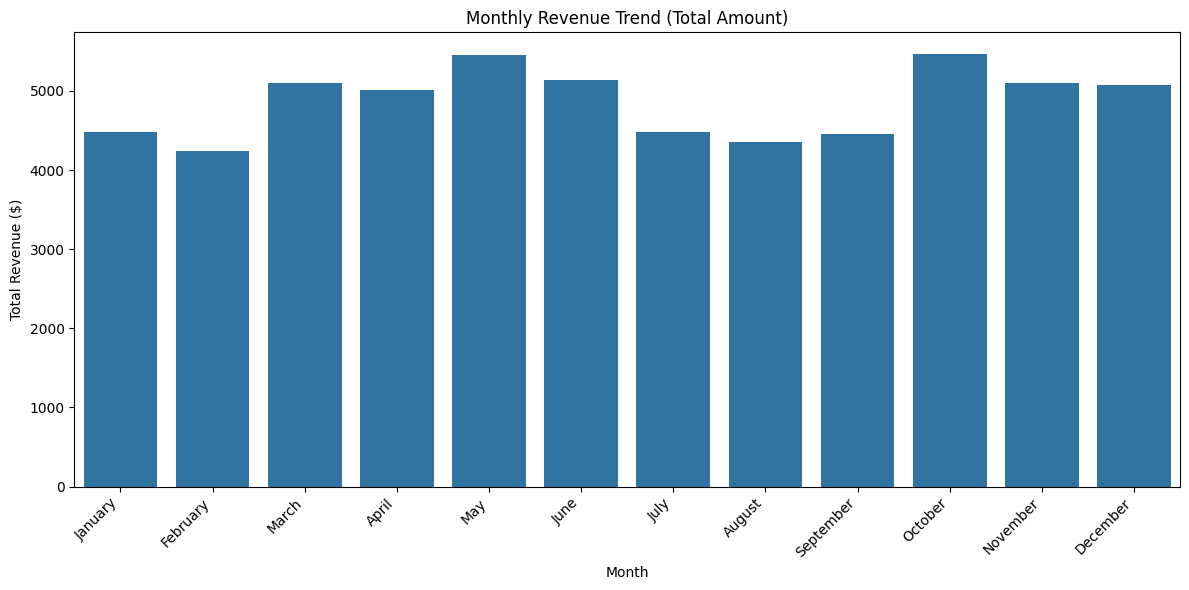

In [ ]:
# Group data by month and analyse monthly revenue
if 'pickup_month' not in df_new.columns:
    df_new['pickup_month'] = df_new['tpep_pickup_datetime'].dt.month_name()

monthly_revenue = df_new.groupby('pickup_month')['total_amount'].sum()
months_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']
monthly_revenue = monthly_revenue.reindex(months_order)

plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values)
plt.title('Monthly Revenue Trend (Total Amount)')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [ ]:
# Calculate proportion of each quarter
df_new['pickup_quarter'] = df_new['tpep_pickup_datetime'].dt.to_period('Q')
quarterly_revenue = df_new.groupby('pickup_quarter')['total_amount'].sum()
quarterly_proportion = (quarterly_revenue / quarterly_revenue.sum()) * 100
quarterly_proportion.round(2)


,total_amount
pickup_quarter,
2022Q4,0.00
2023Q1,23.69
2023Q2,26.73
2023Q3,22.77
2023Q4,26.81


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

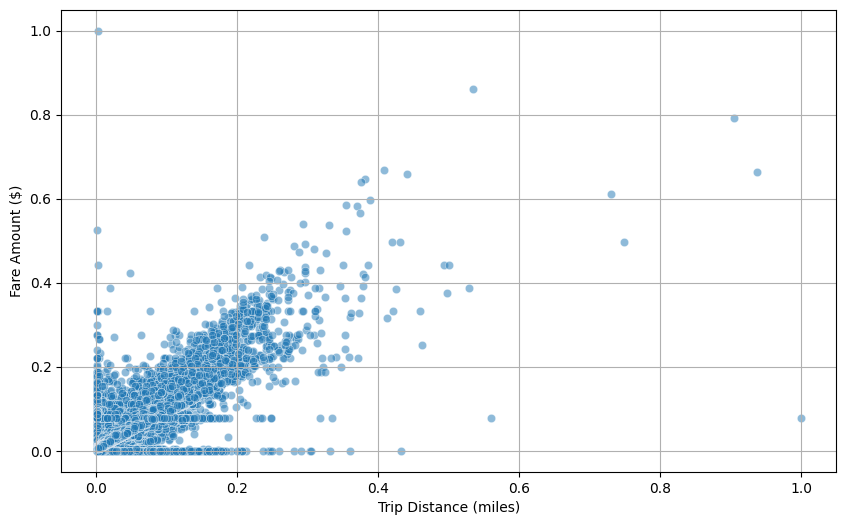

Correlation between trip distance and fare amount (excluding zero distance trips): 0.93


In [ ]:
# Show how trip fare is affected by distance
filtered_df = df_new[df_new['trip_distance'] > 0]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', data=filtered_df, alpha=0.5)
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()

correlation = filtered_df['trip_distance'].corr(filtered_df['fare_amount'])
print(f"Correlation between trip distance and fare amount (excluding zero distance trips): {correlation:.2f}")


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

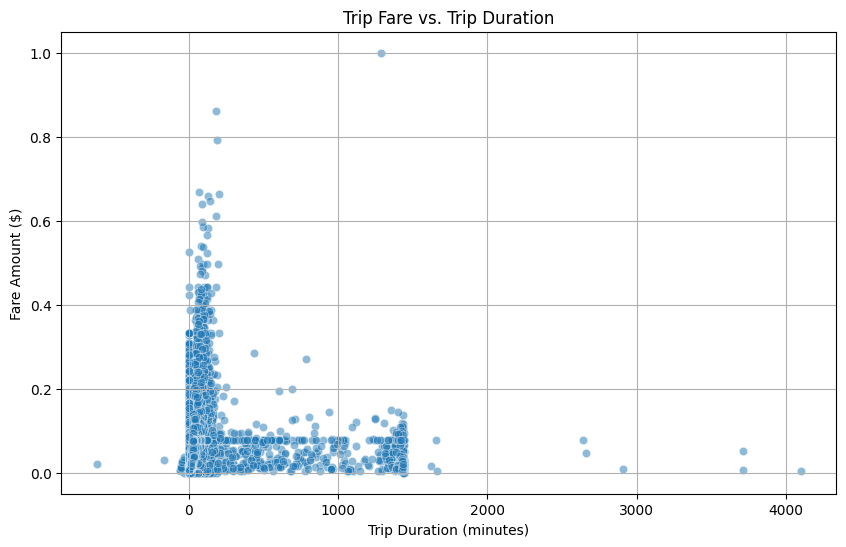

Correlation between trip duration and fare amount: 0.27


In [ ]:
# Show relationship between fare and trip duration
df_new['trip_duration'] = (df_new['tpep_dropoff_datetime'] - df_new['tpep_pickup_datetime']).dt.total_seconds() / 60

plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_duration', y='fare_amount', data=df_new, alpha=0.5)  # Added alpha for better visibility
plt.title('Trip Fare vs. Trip Duration')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()

correlation = df_new['trip_duration'].corr(df_new['fare_amount'])
print(f"Correlation between trip duration and fare amount: {correlation:.2f}")


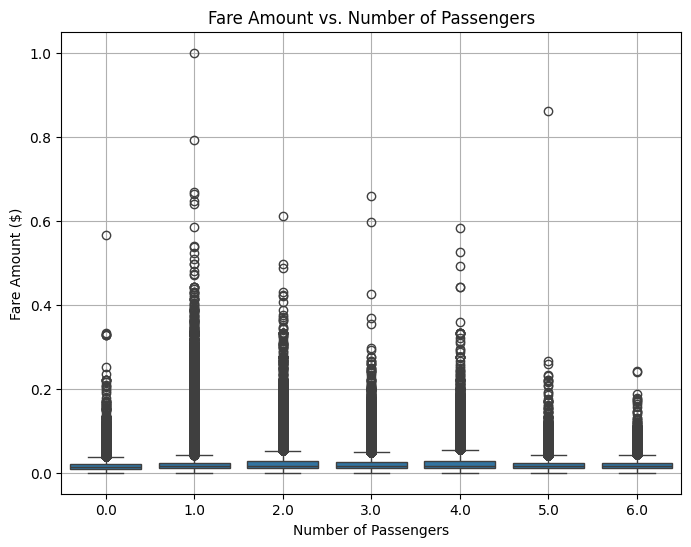

Correlation between passenger count and fare amount: 0.05


In [ ]:
# Show relationship between fare and number of passengers
plt.figure(figsize=(8, 6))
sns.boxplot(x='passenger_count', y='fare_amount', data=df_new)
plt.title('Fare Amount vs. Number of Passengers')
plt.xlabel('Number of Passengers')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()

correlation = df_new['passenger_count'].corr(df_new['fare_amount'])
print(f"Correlation between passenger count and fare amount: {correlation:.2f}")


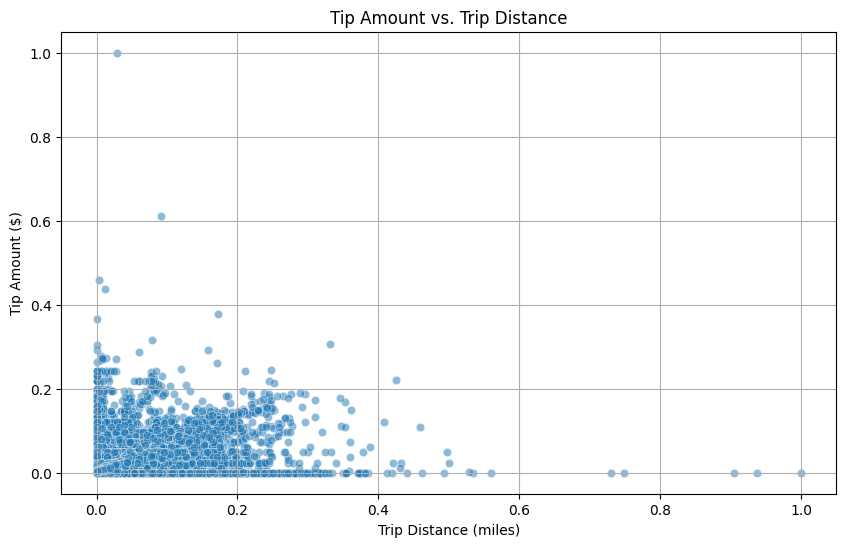

Correlation between trip distance and tip amount: 0.57


In [ ]:
# Show relationship between tip and trip distance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='tip_amount', data=df_new, alpha=0.5)  # Added alpha for better visibility
plt.title('Tip Amount vs. Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.grid(True)
plt.show()

correlation = df_new['trip_distance'].corr(df_new['tip_amount'])
print(f"Correlation between trip distance and tip amount: {correlation:.2f}")


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

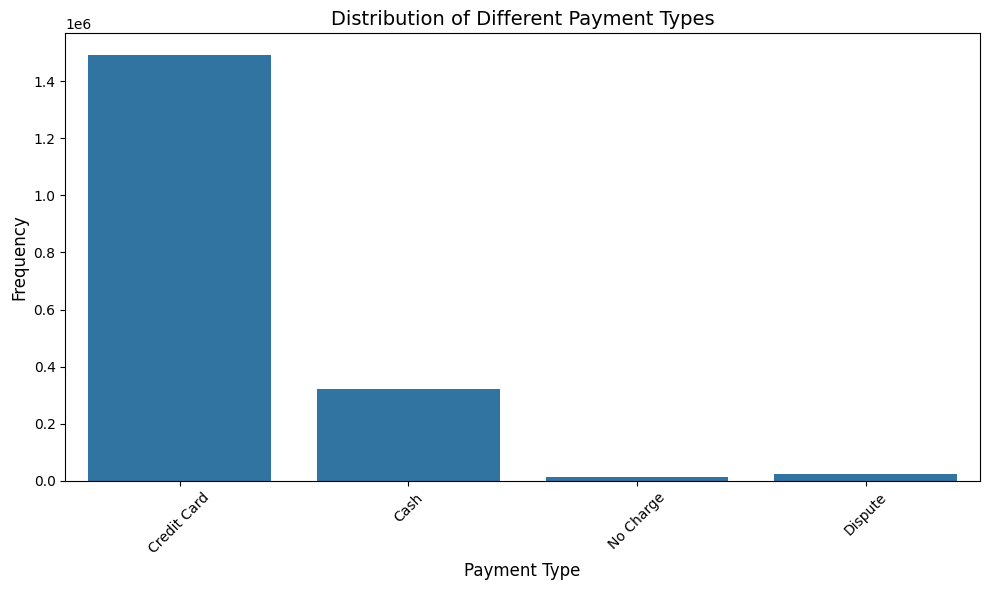

payment_type
1    80.66
2    17.33
3     0.66
4     1.35
Name: count, dtype: float64


In [ ]:
# Analyse the distribution of different payment types (payment_type).
all_payment_types = [1, 2, 3, 4, 5, 6]
payment_type_labels = ['Credit Card', 'Cash', 'No Charge', 'Dispute', 'Unknown', 'Voided Trip']
payment_type_counts = df_new['payment_type'].value_counts().reindex(all_payment_types, fill_value=0)
payment_df = pd.DataFrame({
    'Type': payment_type_labels,
    'Count': payment_type_counts.values
})
payment_df = payment_df[payment_df['Count'] > 0]
plt.figure(figsize=(10, 6))
sns.barplot(data=payment_df, x='Type', y='Count')
plt.title('Distribution of Different Payment Types', fontsize=14)
plt.xlabel('Payment Type', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

payment_type_percentage = (payment_type_counts / payment_type_counts.sum()) * 100
non_zero_percentages = payment_type_percentage[payment_type_percentage > 0]
print(non_zero_percentages.round(2))


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [ ]:
import geopandas as gpd

# Read the shapefile using geopandas
zones = gpd.read_file('/content/drive/MyDrive/Assignments/EDA/taxi_zones.shp') # read the .shp file using gpd
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

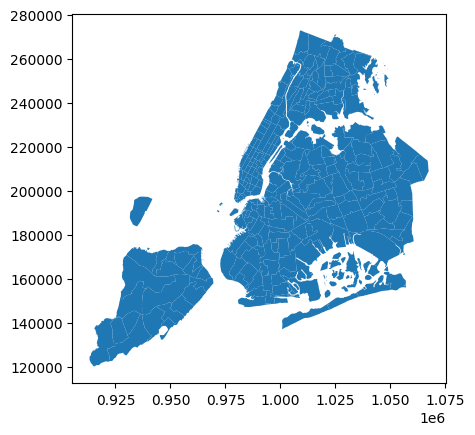

In [ ]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [ ]:
# Merge zones and trip records using locationID and PULocationID
merged_df = pd.merge(df, zones, left_on='PULocationID', right_on='LocationID', how='left')

# Display the merged DataFrame
merged_df.head()



,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,pickup_date,pickup_hour,airport_fee,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,2,2023-08-31 23:56:01,2023-09-01 00:18:41,1.0,3.11,1.0,N,114,246,1,...,2023-08-31,23,NaN,114.0,0.031727,0.000047,Greenwich Village South,114.0,Manhattan,"POLYGON ((986306.712 203122.786, 986300.242 20..."
1,2,2023-09-01 00:30:27,2023-09-01 00:48:16,1.0,3.53,1.0,N,230,232,1,...,2023-09-01,0,NaN,230.0,0.031028,0.000056,Times Sq/Theatre District,230.0,Manhattan,"POLYGON ((988786.877 214532.094, 988650.277 21..."
2,2,2023-09-01 00:30:37,2023-09-01 01:09:47,1.0,17.23,1.0,N,132,188,1,...,2023-09-01,0,NaN,132.0,0.245479,0.002038,JFK Airport,132.0,Queens,"MULTIPOLYGON (((1032791.001 181085.006, 103283..."
3,2,2023-09-01 00:19:39,2023-09-01 00:24:08,6.0,0.49,1.0,N,48,230,2,...,2023-09-01,0,NaN,48.0,0.043747,0.000094,Clinton East,48.0,Manhattan,"POLYGON ((986694.313 214463.846, 986568.184 21..."
4,1,2023-09-01 00:17:14,2023-09-01 00:29:06,1.0,2.00,1.0,N,144,68,1,...,2023-09-01,0,NaN,144.0,0.027620,0.000047,Little Italy/NoLiTa,144.0,Manhattan,"POLYGON ((985411.76 200369.518, 985342.573 200..."


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [ ]:
# Group data by location and calculate the number of trips

# Group data by pickup location (PULocationID) and count trips
trip_counts = df_new.groupby('PULocationID').size().reset_index(name='num_trips')

# Display the result
trip_counts.head()  # Show the first few rows


,PULocationID,num_trips
0,1,246
1,2,2
2,3,47
3,4,1861
4,5,19


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [ ]:
# Merge trip counts back to the zones GeoDataFrame
zones_with_trips = pd.merge(zones, trip_counts, left_on='LocationID', right_on='PULocationID', how='left')

# Display the merged GeoDataFrame
zones_with_trips.head()




,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,PULocationID,num_trips
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",1.0,246.0
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",2.0,2.0
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2...",3.0,47.0
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",4.0,1861.0
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144...",5.0,19.0


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

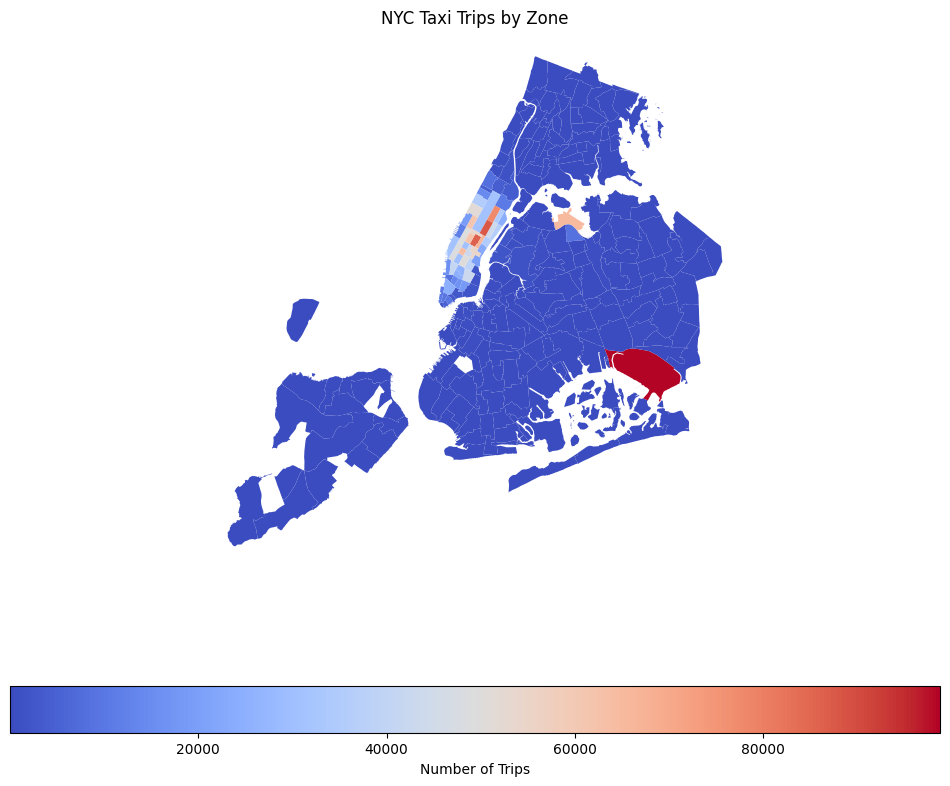

In [ ]:
# Define figure and axis

# Plot the map and display it
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
zones_with_trips.plot(
    column='num_trips',
    ax=ax,
    legend=True,
    legend_kwds={
        'label': "Number of Trips",
        'orientation': "horizontal"
    },
    cmap='coolwarm'
)

ax.set_title("NYC Taxi Trips by Zone")
plt.axis('off')
plt.show()



In [ ]:
# can you try displaying the zones DF sorted by the number of trips?
zones_with_trips_sort = zones_with_trips.sort_values(by='num_trips', ascending=False)
zones_with_trips_sort.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,PULocationID,num_trips
131,132,0.245479,0.002038,JFK Airport,132,Queens,"MULTIPOLYGON (((1032791.001 181085.006, 103283...",132.0,98789.0
236,237,0.042213,0.000096,Upper East Side South,237,Manhattan,"POLYGON ((993633.442 216961.016, 993507.232 21...",237.0,87946.0
160,161,0.035804,0.000072,Midtown Center,161,Manhattan,"POLYGON ((991081.026 214453.698, 990952.644 21...",161.0,86405.0
235,236,0.044252,0.000103,Upper East Side North,236,Manhattan,"POLYGON ((995940.048 221122.92, 995812.322 220...",236.0,77635.0
161,162,0.035270,0.000048,Midtown East,162,Manhattan,"POLYGON ((992224.354 214415.293, 992096.999 21...",162.0,66102.0


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [ ]:
# Find routes which have the slowest speeds at different times of the day
df_route = df_new[['PULocationID', 'DOLocationID', 'trip_distance', 'tpep_pickup_datetime', 'tpep_dropoff_datetime']].copy()
df_route['trip_duration_hrs'] = (df_route['tpep_dropoff_datetime'] - df_route['tpep_pickup_datetime']).dt.total_seconds() / 3600
df_route = df_route[(df_route['trip_duration_hrs'] > 0) & (df_route['trip_distance'] > 0)]
df_route['pickup_hour'] = df_route['tpep_pickup_datetime'].dt.hour
grouped = df_route.groupby(['PULocationID', 'DOLocationID', 'pickup_hour'])
speed_data = grouped.agg({
    'trip_distance': 'mean',
    'trip_duration_hrs': 'mean'
}).reset_index()
speed_data['avg_speed_mph'] = speed_data['trip_distance'] / speed_data['trip_duration_hrs']
slowest_routes = speed_data.sort_values(by='avg_speed_mph').head(10)
print(slowest_routes[['PULocationID', 'DOLocationID', 'pickup_hour', 'avg_speed_mph']])



        PULocationID  DOLocationID  pickup_hour  avg_speed_mph
111555           237           193            9       0.000084
1079               7           149           12       0.000096
86692            182           250           19       0.000103
91728            209           209           14       0.000120
41637            114           193           21       0.000138
76318            162           138           22       0.000176
121710           260           129           17       0.000182
3083              13           211            0       0.000256
94251            216           216            7       0.000264
1506              10           145           11       0.000267


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

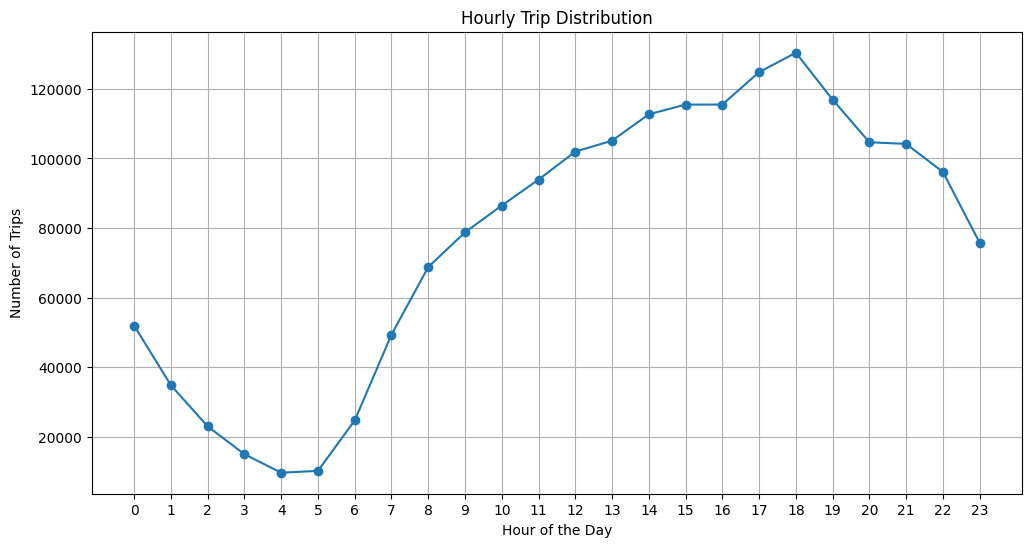

Busiest hour: 18
Number of trips during busiest hour: 130389


In [ ]:
# Visualise the number of trips per hour and find the busiest hour
df_new['pickup_hour'] = df_new['tpep_pickup_datetime'].dt.hour
hourly_trips = df_new.groupby('pickup_hour')['tpep_pickup_datetime'].count().reset_index(name='trip_count')
busiest_hour = hourly_trips.loc[hourly_trips['trip_count'].idxmax()]

plt.figure(figsize=(12, 6))
plt.plot(hourly_trips['pickup_hour'], hourly_trips['trip_count'], marker='o')
plt.title('Hourly Trip Distribution')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(range(24))
plt.grid(True)
plt.show()
print(f"Busiest hour: {busiest_hour['pickup_hour']}")
print(f"Number of trips during busiest hour: {busiest_hour['trip_count']}")


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [ ]:
df_new['pickup_hour'] = df_new['tpep_pickup_datetime'].dt.hour
trip_counts = df_new['pickup_hour'].value_counts().sort_index()

In [ ]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.1

max5_hours = trip_counts.sort_values(ascending=False).head(5)
scaled_max5_hours = (max5_hours / sample_fraction).astype(int)
max5_hours


,count
pickup_hour,
18,130389
17,124796
19,116917
16,115489
15,115483


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

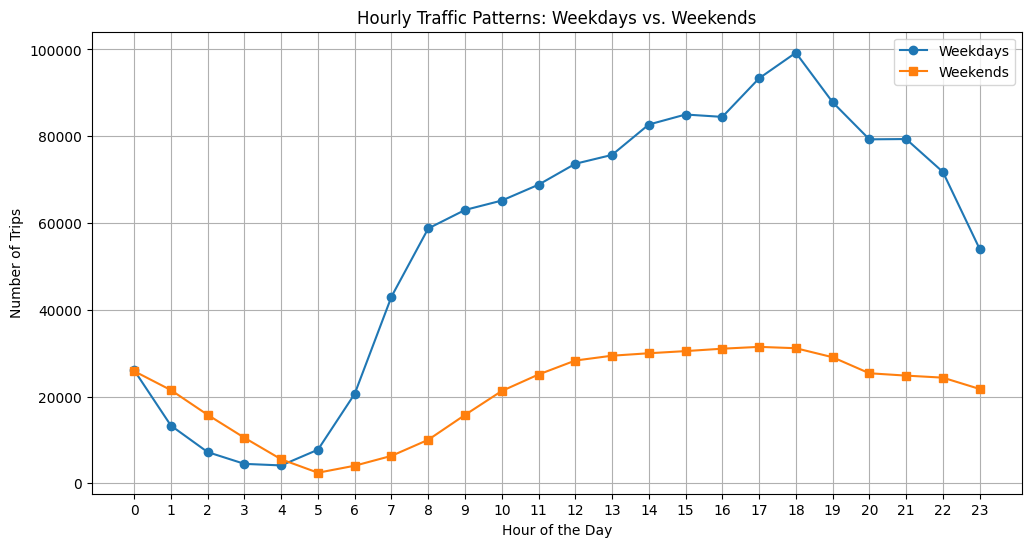

In [ ]:
# Compare traffic trends for the week days and weekends
df_new['day_of_week'] = df_new['tpep_pickup_datetime'].dt.dayofweek  # Monday=0, Sunday=6
weekdays_df = df_new[df_new['day_of_week'] < 5]  # Monday to Friday
weekends_df = df_new[df_new['day_of_week'] >= 5]  # Saturday and Sunday
weekday_hourly_counts = weekdays_df.groupby(weekdays_df['tpep_pickup_datetime'].dt.hour)['tpep_pickup_datetime'].count()
weekend_hourly_counts = weekends_df.groupby(weekends_df['tpep_pickup_datetime'].dt.hour)['tpep_pickup_datetime'].count()

plt.figure(figsize=(12, 6))
plt.plot(weekday_hourly_counts.index, weekday_hourly_counts.values, label='Weekdays', marker='o')
plt.plot(weekend_hourly_counts.index, weekend_hourly_counts.values, label='Weekends', marker='s')
plt.title('Hourly Traffic Patterns: Weekdays vs. Weekends')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(range(24))
plt.legend()
plt.grid(True)
plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [ ]:
# Find top 10 pickup and dropoff zones

# Count pickups by location ID
top_pickup = df_new['PULocationID'].value_counts().head(10).reset_index()
top_pickup.columns = ['LocationID', 'Pickup_Trips']

# Merge with zones to get zone names
top_pickup = top_pickup.merge(zones[['LocationID', 'zone']], on='LocationID', how='left')
print("Top 10 Pickup Zones:")
top_pickup



Top 10 Pickup Zones:


,LocationID,Pickup_Trips,zone
0,132,98789,JFK Airport
1,237,87946,Upper East Side South
2,161,86405,Midtown Center
3,236,77635,Upper East Side North
4,162,66102,Midtown East
5,138,64858,LaGuardia Airport
6,186,64201,Penn Station/Madison Sq West
7,230,61880,Times Sq/Theatre District
8,142,61186,Lincoln Square East
9,170,54490,Murray Hill


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [ ]:
# Count dropoffs by location ID
top_dropoffs = df_new['DOLocationID'].value_counts().head(10).reset_index()
top_dropoffs.columns = ['LocationID', 'Dropoff_Trips']

# Merge with zones to get zone names
top_dropoffs = top_dropoffs.merge(zones[['LocationID', 'zone']], on='LocationID', how='left')
print("Top 10 Dropoff Zones:")
top_dropoffs


Top 10 Dropoff Zones:


,LocationID,Dropoff_Trips,zone
0,236,82124,Upper East Side North
1,237,78416,Upper East Side South
2,161,72751,Midtown Center
3,230,57314,Times Sq/Theatre District
4,170,54633,Murray Hill
5,162,52088,Midtown East
6,239,51928,Upper West Side South
7,142,51818,Lincoln Square East
8,141,48926,Lenox Hill West
9,68,46336,East Chelsea


In [ ]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
import numpy as np
pickup_counts = df_new['PULocationID'].value_counts().rename('pickup_count')
dropoff_counts = df_new['DOLocationID'].value_counts().rename('dropoff_count')

ratios = pd.concat([pickup_counts, dropoff_counts], axis=1).fillna(0)
ratios['pickup_dropoff_ratio'] = ratios['pickup_count'] / ratios['dropoff_count'].replace(0, np.nan)
ratios = ratios.reset_index().rename(columns={'index': 'LocationID'})
ratios = ratios.merge(zones[['LocationID', 'zone']], on='LocationID', how='left')
ratios = ratios.set_index('zone')
pickup_dropoff_ratios = ratios['pickup_dropoff_ratio']
top_pickup_dropoff_ratio = pickup_dropoff_ratios.sort_values(ascending=False).head(10)
bottom_pickup_dropoff_ratio = pickup_dropoff_ratios.sort_values().head(10)

top_pickup_dropoff_ratio

,pickup_dropoff_ratio
zone,
East Elmhurst,7.602473
JFK Airport,4.462418
LaGuardia Airport,2.904523
Penn Station/Madison Sq West,1.590196
Greenwich Village South,1.380461
Central Park,1.358355
West Village,1.338495
Midtown East,1.269045
Garment District,1.190779


In [ ]:
bottom_pickup_dropoff_ratio

,pickup_dropoff_ratio
zone,
Freshkills Park,0.000000
Green-Wood Cemetery,0.000000
Oakwood,0.000000
Grymes Hill/Clifton,0.000000
Rossville/Woodrow,0.000000
Heartland Village/Todt Hill,0.023256
Saint George/New Brighton,0.025000
West Brighton,0.041667
Highbridge Park,0.044444


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [ ]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
night_hours_df = df_new[(df_new['tpep_pickup_datetime'].dt.hour >= 23) | (df_new['tpep_pickup_datetime'].dt.hour < 5)]
night_hours_df = night_hours_df.merge(
    zones[['LocationID', 'zone']].rename(columns={'zone': 'pickup_zone'}),
    left_on='PULocationID',
    right_on='LocationID',
    how='left'
)
night_hours_df = night_hours_df.merge(
    zones[['LocationID', 'zone']].rename(columns={'zone': 'dropoff_zone'}),
    left_on='DOLocationID',
    right_on='LocationID',
    how='left'
)
top_night_pickups = night_hours_df.groupby('pickup_zone')['PULocationID'].count().sort_values(ascending=False).head(10)
top_night_dropoffs = night_hours_df.groupby('dropoff_zone')['DOLocationID'].count().sort_values(ascending=False).head(10)


In [ ]:
top_night_pickups

,PULocationID
pickup_zone,
East Village,15524
JFK Airport,13707
West Village,12573
Clinton East,9877
Lower East Side,9714
Greenwich Village South,8804
Times Sq/Theatre District,7912
Penn Station/Madison Sq West,6362
Midtown South,6110


In [ ]:
top_night_dropoffs

,DOLocationID
dropoff_zone,
East Village,8373
Clinton East,7004
Murray Hill,6070
Gramercy,5631
East Chelsea,5523
Lenox Hill West,5194
Yorkville West,4991
West Village,4974
Times Sq/Theatre District,4453


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [ ]:
# Filter for night hours (11 PM to 5 AM)
df_new['pickup_hour'] = df_new['tpep_pickup_datetime'].dt.hour

night_df = df_new[(df_new['pickup_hour'] >= 23) | (df_new['pickup_hour'] <= 5)]  # 11 PM - 5 AM
daytime_df = df_new[(df_new['pickup_hour'] >= 6) & (df_new['pickup_hour'] <= 22)]  # 6 AM - 10 PM

nighttime_revenue = night_df['total_amount'].sum()
daytime_revenue = daytime_df['total_amount'].sum()

total_revenue = df_new['total_amount'].sum()

nighttime_revenue_share = (nighttime_revenue / total_revenue) * 100
daytime_revenue_share = (daytime_revenue / total_revenue) * 100

print(f"Nighttime Revenue Share: {nighttime_revenue_share:.2f}%")
print(f"Daytime Revenue Share: {daytime_revenue_share:.2f}%")


Nighttime Revenue Share: 12.09%
Daytime Revenue Share: 87.91%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [ ]:
# Analyse the fare per mile per passenger for different passenger counts
valid_fares = df_new[(df_new['trip_distance'] > 0) & (df_new['passenger_count'] > 0)].copy()
valid_fares.loc[:, 'fare_per_mile_per_passenger'] = (
    valid_fares['total_amount'] /
    (valid_fares['trip_distance'] * valid_fares['passenger_count']))
avg_fare_by_passenger = (valid_fares.groupby('passenger_count')['fare_per_mile_per_passenger'].mean())
avg_fare_by_passenger



,fare_per_mile_per_passenger
passenger_count,
1.0,4.054886
2.0,2.363664
3.0,1.534000
4.0,1.477359
5.0,0.661306
6.0,0.593923


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [ ]:
# Compare the average fare per mile for different days and for different times of the day
valid_df = df_new[(df_new['trip_distance'] > 0) & (df_new['total_amount'] > 0)].copy()

valid_df['day_of_week'] = valid_df['tpep_pickup_datetime'].dt.day_name().astype('object')
valid_df['hour_of_day'] = valid_df['tpep_pickup_datetime'].dt.hour

valid_df['fare_per_mile'] = valid_df['total_amount'] / valid_df['trip_distance']

fare_by_day = valid_df.groupby('day_of_week')['fare_per_mile'].mean().round(2)
fare_by_hour = valid_df.groupby('hour_of_day')['fare_per_mile'].mean().round(2)

ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fare_by_day = fare_by_day.reindex(ordered_days)



In [ ]:
fare_by_day

,fare_per_mile
day_of_week,
Monday,4.15
Tuesday,4.15
Wednesday,4.22
Thursday,4.41
Friday,4.30
Saturday,4.11
Sunday,4.28


In [ ]:
fare_by_hour

,fare_per_mile
hour_of_day,
0,4.06
1,3.83
2,3.96
3,4.18
4,5.12
5,4.85
6,3.53
7,3.68
8,3.62


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

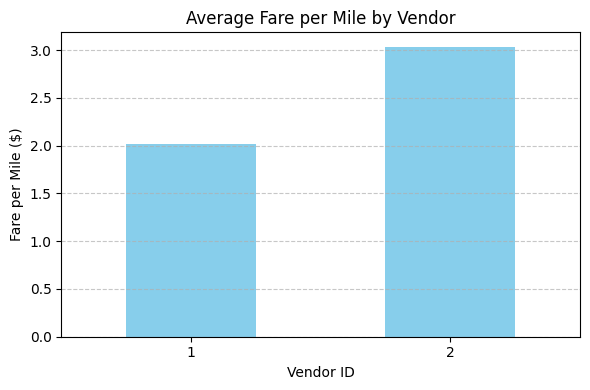

In [ ]:
# Compare fare per mile for different vendors
df_vendor = df_new[df_new['trip_distance'] > 0].copy()

df_vendor['fare_per_mile'] = df_vendor['fare_amount'] / df_vendor['trip_distance']

vendor_fare_comparison = df_vendor.groupby('VendorID')['fare_per_mile'].mean().sort_values()

vendor_fare_comparison.plot(kind='bar', color='skyblue', figsize=(6, 4))
plt.title('Average Fare per Mile by Vendor')
plt.xlabel('Vendor ID')
plt.ylabel('Fare per Mile ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


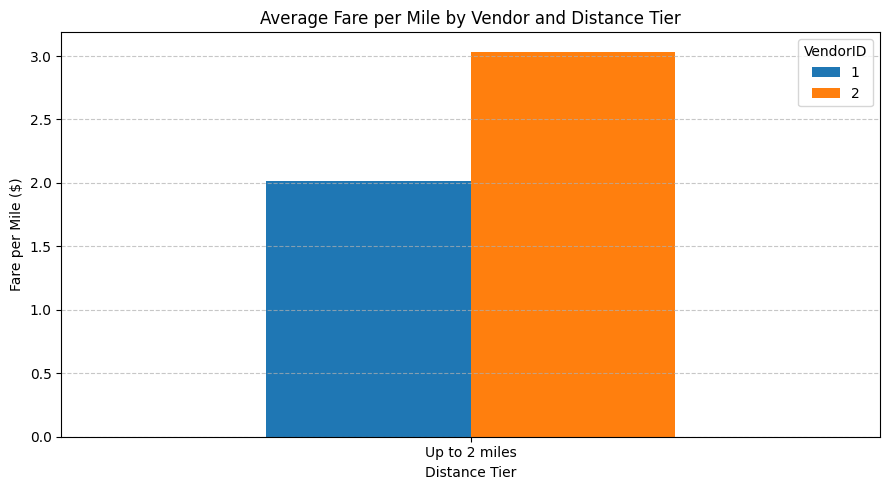

In [ ]:
# Defining distance tiers
df_new['fare_per_mile'] = df_new['fare_amount'] / df_new['trip_distance']
df_new = df_new[df_new['trip_distance'] > 0]

tier1 = df_new[df_new['trip_distance'] <= 2].copy()
tier2 = df_new[(df_new['trip_distance'] > 2) & (df_new['trip_distance'] <= 5)].copy()
tier3 = df_new[df_new['trip_distance'] > 5].copy()

tier1['distance_tier'] = 'Up to 2 miles'
tier2['distance_tier'] = '2 to 5 miles'
tier3['distance_tier'] = 'More than 5 miles'

tiered_data = pd.concat([tier1, tier2, tier3])

avg_fare_by_tier = tiered_data.groupby(['distance_tier', 'VendorID'])['fare_per_mile'].mean().unstack()

avg_fare_by_tier.plot(kind='bar', figsize=(9, 5))
plt.title('Average Fare per Mile by Vendor and Distance Tier')
plt.xlabel('Distance Tier')
plt.ylabel('Fare per Mile ($)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [ ]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

df_new['tip_percentage'] = (df_new['tip_amount'] / (df_new['total_amount'] + 1e-6)) * 100


tips_df = df_new[['trip_distance', 'passenger_count', 'total_amount', 'tip_amount', 'pickup_hour', 'tip_percentage']].copy()

tips_df['hour'] = tips_df['pickup_hour']


tips_df['distance_category'] = pd.cut(
    tips_df['trip_distance'], [0, 2, 5, float('inf')],
    labels=['Up to 2 miles', '2 to 5 miles', 'More than 5 miles']
)

tips_df['passenger_category'] = pd.cut(
    tips_df['passenger_count'], [0, 1, 3, float('inf')],
    labels=['1 passenger', '2-3 passengers', '4+ passengers']
)

tips_df['pickup_times_category'] = pd.cut(
    tips_df['hour'], [0, 6, 12, 18, 24],
    labels=['Midnight to 6 AM', '6 AM to Noon', 'Noon to 6 PM', '6 PM to Midnight'],
    right=False
)


print("Average Tip Percentage by Distance:")
print(tips_df.groupby('distance_category', observed=False)['tip_percentage'].mean())

print("\nAverage Tip Percentage by Passenger Count:")
print(tips_df.groupby('passenger_category', observed=False)['tip_percentage'].mean())

print("\nAverage Tip Percentage by Time of Pickup:")
print(tips_df.groupby('pickup_times_category', observed=False)['tip_percentage'].mean())

# Low tip scenarios (<10%)
low_tip_factors = tips_df[tips_df['tip_percentage'] < 10]

print("\nMost Common Low Tip Scenarios:")
print(
    low_tip_factors.groupby(
        ['distance_category', 'passenger_category', 'pickup_times_category'],
        observed=False
    )
    .size()
    .sort_values(ascending=False)
    .head(10)
)

# Distance bins
distance_bins = [0, 1, 2, 5, 10, 20, 50]
tips_df['distance_bin'] = pd.cut(tips_df['trip_distance'], bins=distance_bins)

tip_by_distance = tips_df.groupby('distance_bin', observed=False)['tip_percentage'].mean()


Average Tip Percentage by Distance:
distance_category
Up to 2 miles        227.065949
2 to 5 miles                NaN
More than 5 miles           NaN
Name: tip_percentage, dtype: float64

Average Tip Percentage by Passenger Count:
passenger_category
1 passenger       219.658282
2-3 passengers    281.552950
4+ passengers     189.119227
Name: tip_percentage, dtype: float64

Average Tip Percentage by Time of Pickup:
pickup_times_category
Midnight to 6 AM    547.055798
6 AM to Noon        182.936718
Noon to 6 PM        256.631003
6 PM to Midnight    150.591821
Name: tip_percentage, dtype: float64

Most Common Low Tip Scenarios:
distance_category  passenger_category  pickup_times_category
Up to 2 miles      1 passenger         Noon to 6 PM             120101
                                       6 PM to Midnight          90770
                                       6 AM to Noon              75362
                   2-3 passengers      Noon to 6 PM              36849
                       

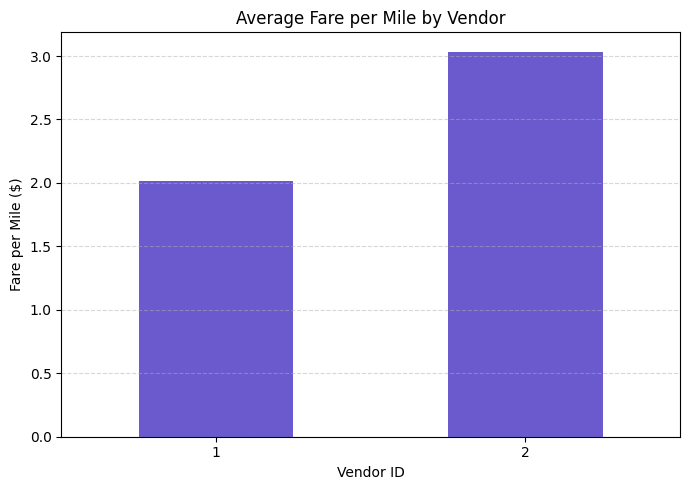

In [ ]:
vendor_fare = df_new.groupby('VendorID')['fare_per_mile'].mean().sort_values()

vendor_fare.plot(kind='bar', color='slateblue', figsize=(7, 5))
plt.title('Average Fare per Mile by Vendor')
plt.xlabel('Vendor ID')
plt.ylabel('Fare per Mile ($)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

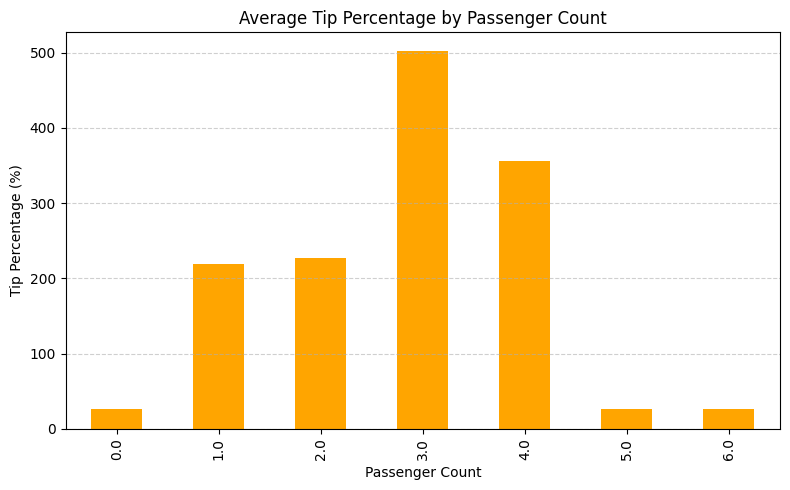

In [ ]:
tip_by_passenger = df_new.groupby('passenger_count')['tip_percentage'].mean()

tip_by_passenger.plot(kind='bar', figsize=(8, 5), color='orange')
plt.title('Average Tip Percentage by Passenger Count')
plt.ylabel('Tip Percentage (%)')
plt.xlabel('Passenger Count')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

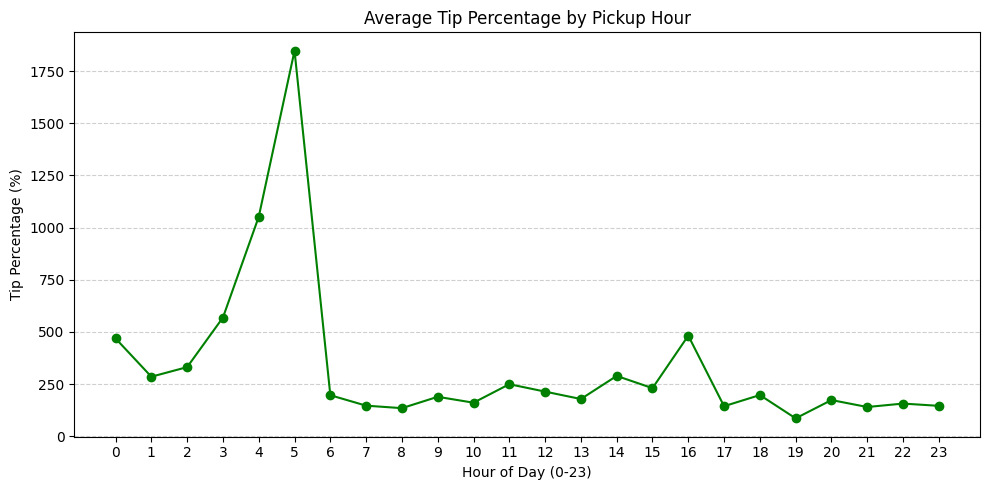

In [ ]:
# Extract pickup hour
df_new['pickup_hour'] = df_new['tpep_pickup_datetime'].dt.hour

tip_by_hour = df_new.groupby('pickup_hour')['tip_percentage'].mean()

tip_by_hour.plot(kind='line', marker='o', figsize=(10, 5), color='green')
plt.title('Average Tip Percentage by Pickup Hour')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Tip Percentage (%)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
df_new['tip_percent'] = (df_new['tip_amount'] / (df_new['fare_amount'] + 1e-6)) * 100

low_tip = df_new[df_new['tip_percent'] < 10].copy()
high_tip = df_new[df_new['tip_percent'] > 25].copy()

comparison = pd.DataFrame({
    'Low Tip (<10%)': [
        low_tip['trip_distance'].mean(),
        low_tip['passenger_count'].mean(),
        low_tip['fare_amount'].mean(),
        low_tip['tip_amount'].mean()
    ],
    'High Tip (>25%)': [
        high_tip['trip_distance'].mean(),
        high_tip['passenger_count'].mean(),
        high_tip['fare_amount'].mean(),
        high_tip['tip_amount'].mean()
    ]
}, index=['Avg Trip Distance', 'Avg Passenger Count', 'Avg Fare Amount', 'Avg Tip Amount'])

print("Average Comparison Between Low and High Tip Trips:")
print(comparison.round(2))

Average Comparison Between Low and High Tip Trips:
                     Low Tip (<10%)  High Tip (>25%)
Avg Trip Distance              0.02             0.01
Avg Passenger Count            1.42             1.35
Avg Fare Amount                0.02             0.02
Avg Tip Amount                 0.00             0.01


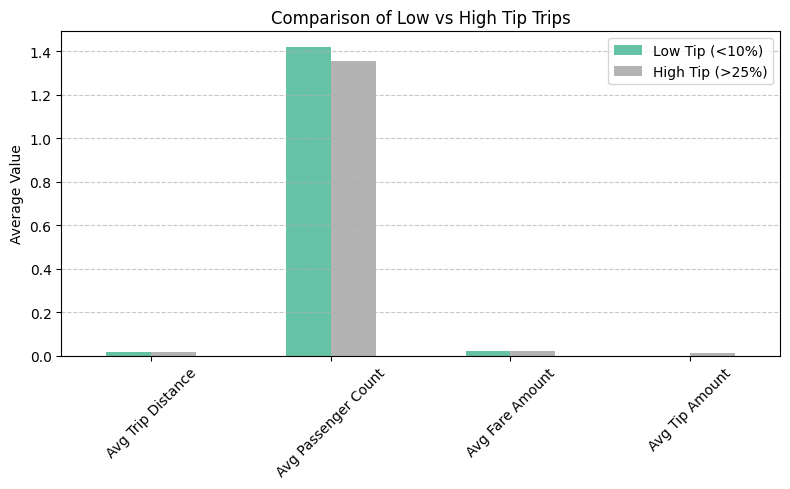

In [ ]:
comparison.plot(kind='bar', figsize=(8, 5), colormap='Set2')
plt.title('Comparison of Low vs High Tip Trips')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

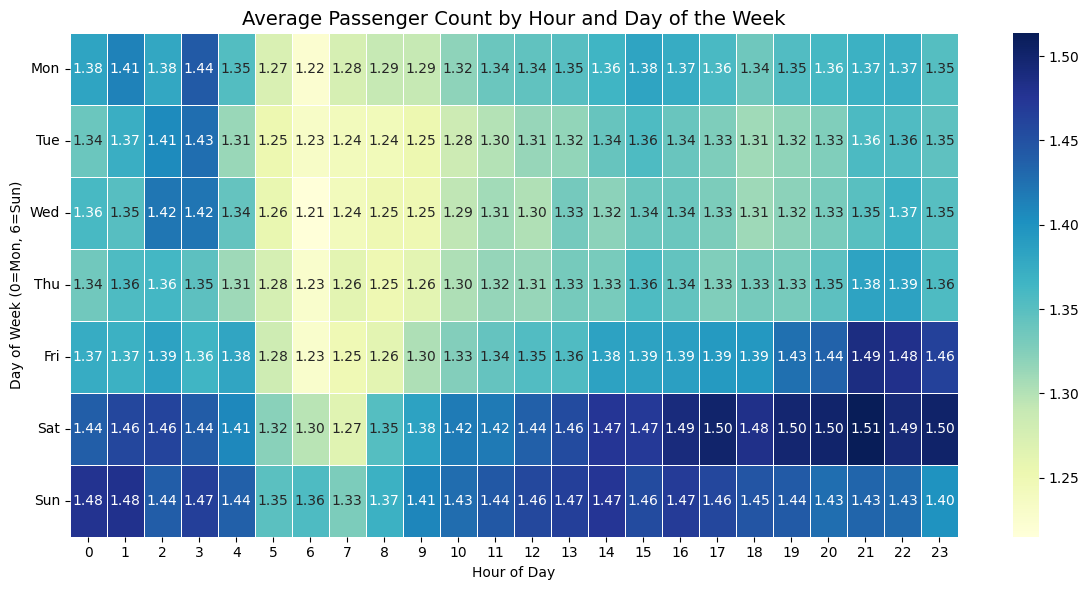

In [ ]:
# See how passenger count varies across hours and days
df_new['pickup_hour'] = df_new['tpep_pickup_datetime'].dt.hour
df_new['pickup_dayofweek'] = df_new['tpep_pickup_datetime'].dt.dayofweek

passenger_variation = df_new.groupby(['pickup_dayofweek', 'pickup_hour'])['passenger_count'].mean().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(passenger_variation, cmap='YlGnBu', linewidths=0.5, annot=True, fmt=".2f")
plt.title('Average Passenger Count by Hour and Day of the Week', fontsize=14)
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week (0=Mon, 6=Sun)')
plt.yticks(ticks=np.arange(7) + 0.5, labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)
plt.tight_layout()
plt.show()



**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

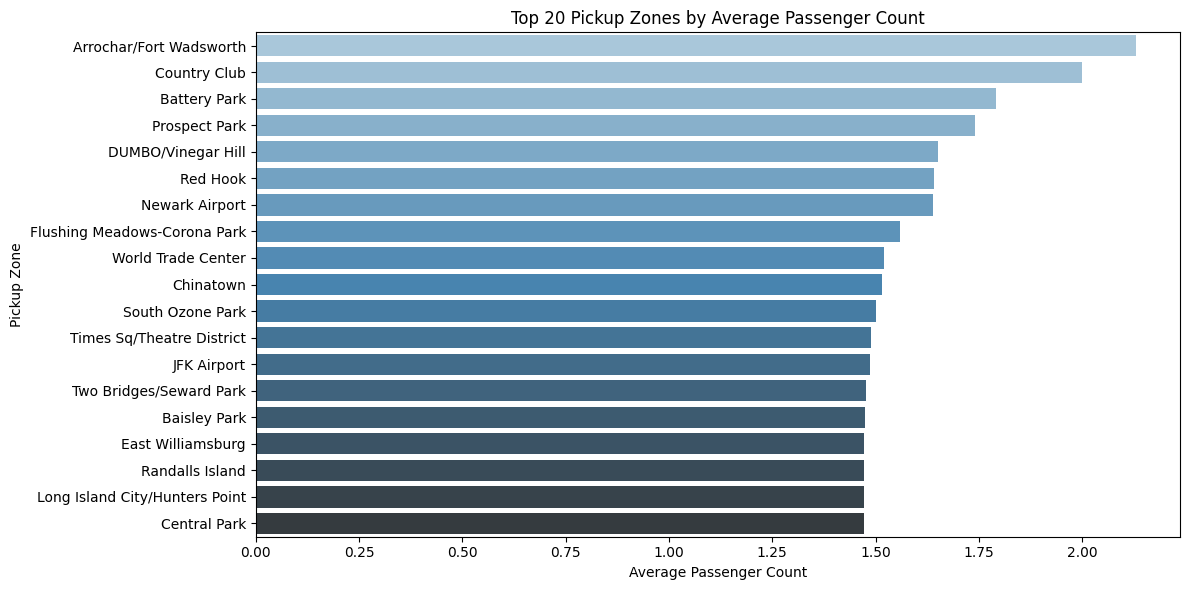

In [ ]:
# How does passenger count vary across zones
zone_passenger_avg = df_new.groupby('PULocationID')['passenger_count'].mean().reset_index()

zone_passenger_avg = zone_passenger_avg.merge(zones[['LocationID', 'zone']], left_on='PULocationID', right_on='LocationID', how='left')

zone_passenger_avg = zone_passenger_avg.sort_values(by='passenger_count', ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(data=zone_passenger_avg, x='passenger_count', y='zone',hue='zone',
    legend=False, palette='Blues_d')
plt.title('Top 20 Pickup Zones by Average Passenger Count')
plt.xlabel('Average Passenger Count')
plt.ylabel('Pickup Zone')
plt.tight_layout()
plt.show()


In [ ]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

avg_passenger_by_zone = df_new.groupby('PULocationID')['passenger_count'].mean().reset_index()
avg_passenger_by_zone.rename(columns={'passenger_count': 'avg_passenger_count'}, inplace=True)
zones_with_trips = zones_with_trips.merge(avg_passenger_by_zone, left_on='LocationID', right_on='PULocationID', how='left')
zones_with_trips.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,PULocationID_x,num_trips,PULocationID_y,avg_passenger_count
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",1.0,246.0,1.0,1.639344
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",2.0,2.0,NaN,NaN
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2...",3.0,47.0,3.0,1.000000
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",4.0,1861.0,4.0,1.411830
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144...",5.0,19.0,5.0,1.000000


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

Frequency of Surcharge Application (%):
extra                    58.774969
mta_tax                  93.795128
tip_amount               73.795870
tolls_amount              7.632324
improvement_surcharge    94.398936
congestion_surcharge     87.673420
airport_fee_combined      8.296167
dtype: float64


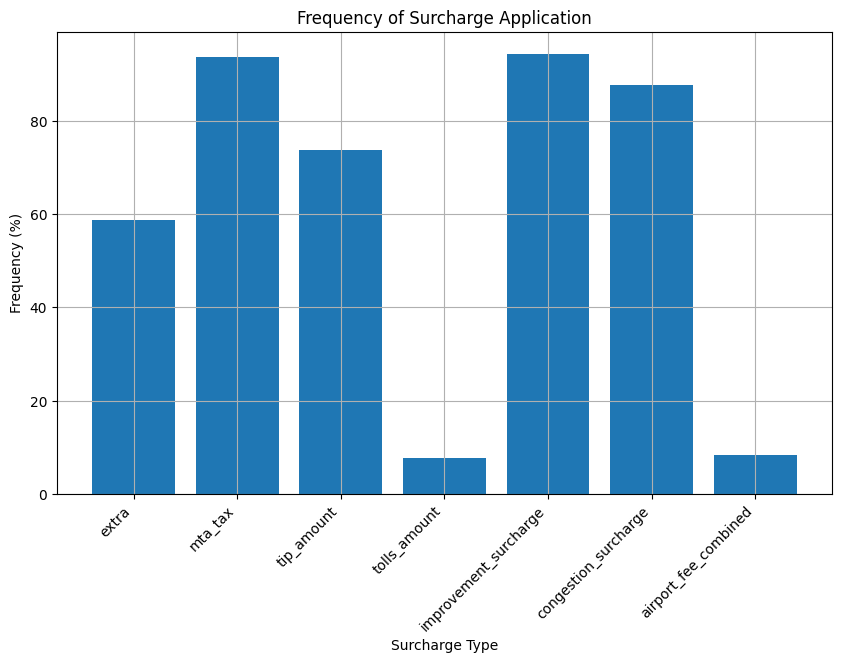

In [ ]:
# How often is each surcharge applied?
surcharge_cols = ['extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge', 'airport_fee_combined']

surcharge_frequency = df_new[surcharge_cols].astype(bool).sum() / len(df) * 100

print("Frequency of Surcharge Application (%):")
print(surcharge_frequency)

plt.figure(figsize=(10, 6))
plt.bar(surcharge_frequency.index, surcharge_frequency.values)
plt.title('Frequency of Surcharge Application')
plt.xlabel('Surcharge Type')
plt.ylabel('Frequency (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

**Key Insights:**

* Time Trends: Demand peaks during rush hours, weekends, and certain months.Nightlife zones show strong late-night activity.

* Financial Patterns: Fares rise with distance and duration. Shared rides offer savings. Tip percentages vary based on ride quality and trip characteristics.

* Geographical Trends: Airports, business hubs, and popular destinations attract the most trips. Some areas show pickup–dropoff imbalances. Nightlife districts become hotspots after dark.

* Vendor/Surcharges: Fare structures differ across vendors, with frequent surcharges and tiered pricing based on distance.



**Recommendations:**

* Demand: Focus resources on high-demand zones and peak timings; strengthen late-night availability; promote shared/group rides.

* Supply: Allocate more taxis to busy areas, use dynamic pricing, encourage repositioning, and offer driver incentives during low-traffic hours.
* Customer Experience: Improve driver training, expand payment options, and actively promote ride-sharing.

* Continuous Improvement: Use data to monitor patterns, gather customer feedback, and collaborate with city officials to improve overall mobility.

**Conclusion Story**

By analyzing travel patterns across time, zones, and trip characteristics, NYC taxi services can better understand rider needs.
Aligning taxi supply with high-demand periods and locations helps reduce wait times and boosts efficiency.
Optimizing pricing through insights on distance, duration, and tipping improves both revenue and customer satisfaction.
Enhanced service quality and flexible payment options strengthen the overall rider experience.
Ongoing data monitoring and feedback ensure that strategies stay relevant and effective.
Together, these data-driven improvements create a more reliable, efficient, and customer-focused taxi system for the city.


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

**Strategically Positioning of Cabs**

* **Hourly Demand Alignment**: Deploy cabs according to changing demand patterns across the day—peak commuting hours, late-night travel spikes, and low-traffic intervals—while considering monthly and seasonal variations.

* **Weekly Movement Patterns**: Focus on office zones and commercial corridors during weekdays, and shift taxis toward leisure areas, residential neighborhoods, and event locations on weekends or holidays.

* **Geographical Priority Zones**: Increase cab presence in consistently busy regions like airports, major transit hubs, and nightlife districts, while addressing zones with uneven pickup and drop-off volumes.

* **Analytics-Based Optimization**: Utilize demand forecasting tools, real-time data feeds, and predictive modeling to reposition taxis dynamically and quickly adapt to sudden shifts in rider activity.

* **Tech-Enabled Coordination**: Use GPS heatmaps, tracking systems, and dashboard insights, supported by regular communication with drivers and cooperation with city authorities to maintain efficient fleet distribution.






**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

**Data-Driven Pricing Strategy Enhancements**

* **Real-Time Demand Pricing:** Implement a dynamic fare structure that adjusts automatically based on rider demand, driver availability, weather conditions, and traffic congestion. Increase prices during heavy rush periods and provide lower rates during slow hours to maintain rider interest.

* **Distance & Zone-Based Tiers:** Introduce flexible pricing tiers where short-distance trips remain affordable, while longer journeys follow a structured, distance-based tariff. Add zone-specific pricing for airports, business districts, and nightlife zones where demand patterns differ significantly.

* **Ride-Sharing Incentives:** Promote shared rides through group discounts, loyalty offers, and reduced per-person fares to increase occupancy levels, lower operational costs, and attract budget-conscious passengers.

* **Optimized Surcharges:** Review surcharge patterns using historical and real-time insights; apply peak surcharges only when justified by demand spikes. Ensure transparency so passengers clearly understand when and why extra charges are added.

* **Market & Competitor Analysis:** Track pricing strategies of rival vendors and adjust fares to stay competitive. Emphasize service quality, reliability, and unique features to justify slightly higher fares where value is delivered.

* **Continuous Data Evaluation:** Use analytics dashboards, A/B pricing experiments, and customer feedback to refine fare models regularly. Update pricing rules dynamically to maximize revenue without compromising customer satisfaction.

